# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
#Import citypy and random modules to make city list

from citipy import citipy
import random

#import modules to make and export API call
from api_keys import weather_api_key
import requests
import json



#Import modules to create graphs of data
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np




## Generate Cities List

In [4]:
#Generate 500 random longitudes
randomlong = []
for i in range(0,600):
    n = random.randint(-180,80)
    randomlong.append(n)

#Generate 500 random Latitudes
randomlat = []
for i in range(0,600):
    n = random.randint(-60,80)
    randomlat.append(n)

#Loop through lat/Long to identify cities with citypy
cities = []
for lat, long in zip(randomlat, randomlong):
    city = citipy.nearest_city(lat, long)
    if city not in cities:
        cities.append(city.city_name)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Loop over Cities using series of API calls. 
#Testing one city
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# append firt city from list to url
city_url = url + "&q=" + cities[0]

# Make API call in Json Format
response_single = requests.get(city_url).json()

print(json.dumps(response_single, indent=4, sort_keys=True))



{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 42.097,
        "lon": -79.2353
    },
    "dt": 1610684981,
    "id": 5122534,
    "main": {
        "feels_like": 23.77,
        "humidity": 93,
        "pressure": 1008,
        "temp": 30.97,
        "temp_max": 32,
        "temp_min": 30
    },
    "name": "Jamestown",
    "sys": {
        "country": "US",
        "id": 4588,
        "sunrise": 1610628178,
        "sunset": 1610662130,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 5.75
    }
}


In [10]:
#Smaller subset for simplicity
cities_small = cities[0:10]


city_lat = []
city_long = []
country = []


temp = []
humidity = [] 
cloudiness = []
wind_speed = []
date = []

count = 0
for city in cities:
        try:
            response = requests.get(url + "&q="+ city).json()
            city_lat.append(round(response["coord"]["lat"],2))
            city_long.append(round(response["coord"]["lon"],2))
            country.append(response["sys"]["country"])
            temp.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind_speed.append(response["wind"]["speed"])
            date.append(response['dt'])
            count = count + 1
            
            print(f"Processing record {count} of Set 1 | {city}")
            print("------------------------------------------------------")
            

        except:
            "Record not found"
        

weather_dict = {
    "City": cities[0:len(city_lat)],
    "Country": country,
    "Latitude":city_lat,
    "Longitude":city_long,
    

    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date": date}
print(weather_dict)
#weather_data = pd.DataFrame(weather_dict)

Processing record 1 of Set 1 | jamestown
------------------------------------------------------
Processing record 2 of Set 1 | puerto ayora
------------------------------------------------------
Processing record 3 of Set 1 | horta
------------------------------------------------------
Processing record 4 of Set 1 | rikitea
------------------------------------------------------
Processing record 5 of Set 1 | caravelas
------------------------------------------------------
Processing record 6 of Set 1 | asfi
------------------------------------------------------
Processing record 7 of Set 1 | rawson
------------------------------------------------------
Processing record 8 of Set 1 | vila do maio
------------------------------------------------------
Processing record 9 of Set 1 | sitka
------------------------------------------------------
Processing record 10 of Set 1 | rikitea
------------------------------------------------------
Processing record 11 of Set 1 | provideniya
---------

Processing record 88 of Set 1 | jamestown
------------------------------------------------------
Processing record 89 of Set 1 | charleston
------------------------------------------------------
Processing record 90 of Set 1 | druskininkai
------------------------------------------------------
Processing record 91 of Set 1 | barrow
------------------------------------------------------
Processing record 92 of Set 1 | victoria
------------------------------------------------------
Processing record 93 of Set 1 | lundazi
------------------------------------------------------
Processing record 94 of Set 1 | rikitea
------------------------------------------------------
Processing record 95 of Set 1 | lagoa
------------------------------------------------------
Processing record 96 of Set 1 | mayumba
------------------------------------------------------
Processing record 97 of Set 1 | vaini
------------------------------------------------------
Processing record 98 of Set 1 | rikitea
----

Processing record 172 of Set 1 | rikitea
------------------------------------------------------
Processing record 173 of Set 1 | saint-pierre
------------------------------------------------------
Processing record 174 of Set 1 | tadpatri
------------------------------------------------------
Processing record 175 of Set 1 | petatlan
------------------------------------------------------
Processing record 176 of Set 1 | ugoofaaru
------------------------------------------------------
Processing record 177 of Set 1 | puerto ayora
------------------------------------------------------
Processing record 178 of Set 1 | avarua
------------------------------------------------------
Processing record 179 of Set 1 | kapaa
------------------------------------------------------
Processing record 180 of Set 1 | longyearbyen
------------------------------------------------------
Processing record 181 of Set 1 | kodiak
------------------------------------------------------
Processing record 182 of 

Processing record 256 of Set 1 | gurupi
------------------------------------------------------
Processing record 257 of Set 1 | souillac
------------------------------------------------------
Processing record 258 of Set 1 | victoria
------------------------------------------------------
Processing record 259 of Set 1 | provideniya
------------------------------------------------------
Processing record 260 of Set 1 | kearney
------------------------------------------------------
Processing record 261 of Set 1 | esil
------------------------------------------------------
Processing record 262 of Set 1 | ixtapa
------------------------------------------------------
Processing record 263 of Set 1 | rikitea
------------------------------------------------------
Processing record 264 of Set 1 | glendive
------------------------------------------------------
Processing record 265 of Set 1 | hofn
------------------------------------------------------
Processing record 266 of Set 1 | yellowkn

Processing record 340 of Set 1 | jamestown
------------------------------------------------------
Processing record 341 of Set 1 | tanout
------------------------------------------------------
Processing record 342 of Set 1 | awjilah
------------------------------------------------------
Processing record 343 of Set 1 | kapaa
------------------------------------------------------
Processing record 344 of Set 1 | tiarei
------------------------------------------------------
Processing record 345 of Set 1 | durango
------------------------------------------------------
Processing record 346 of Set 1 | san cristobal
------------------------------------------------------
Processing record 347 of Set 1 | port alfred
------------------------------------------------------
Processing record 348 of Set 1 | haapiti
------------------------------------------------------
Processing record 349 of Set 1 | hilo
------------------------------------------------------
Processing record 350 of Set 1 | wa

Processing record 425 of Set 1 | kapaa
------------------------------------------------------
Processing record 426 of Set 1 | vaini
------------------------------------------------------
Processing record 427 of Set 1 | atuona
------------------------------------------------------
Processing record 428 of Set 1 | ambilobe
------------------------------------------------------
Processing record 429 of Set 1 | cockburn town
------------------------------------------------------
Processing record 430 of Set 1 | soyo
------------------------------------------------------
Processing record 431 of Set 1 | ponta do sol
------------------------------------------------------
Processing record 432 of Set 1 | rikitea
------------------------------------------------------
Processing record 433 of Set 1 | lindi
------------------------------------------------------
Processing record 434 of Set 1 | provideniya
------------------------------------------------------
Processing record 435 of Set 1 | p

Processing record 509 of Set 1 | arraial do cabo
------------------------------------------------------
Processing record 510 of Set 1 | barrow
------------------------------------------------------
Processing record 511 of Set 1 | victoria
------------------------------------------------------
Processing record 512 of Set 1 | oleksandrivka
------------------------------------------------------
Processing record 513 of Set 1 | norman wells
------------------------------------------------------
Processing record 514 of Set 1 | kapaa
------------------------------------------------------
Processing record 515 of Set 1 | rikitea
------------------------------------------------------
Processing record 516 of Set 1 | mao
------------------------------------------------------
Processing record 517 of Set 1 | mataura
------------------------------------------------------
Processing record 518 of Set 1 | iqaluit
------------------------------------------------------
Processing record 519 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
print(weather_data.head())
#Write df to csv
weather_data.to_csv("City_Data/city_data.csv", index=False, header=True)


           City Country  Latitude  Longitude  Temperature  Humidity  \
0     jamestown      US     42.10     -79.24        32.00        93   
1  puerto ayora      EC     -0.74     -90.35        73.99        93   
2         horta      PT     38.53     -28.63        62.31        87   
3       marcona      PF    -23.12    -134.97        78.30        74   
4       rikitea      BR    -17.71     -39.25        74.35        86   

   Cloudiness  Wind Speed        Date  
0           1        5.75  1610684981  
1          47        4.00  1610684984  
2          95       29.48  1610684984  
3          14       10.18  1610684822  
4           0        4.03  1610684985  


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#Choose Cities with humidity below 100
clean_city_data = weather_data.loc[(weather_data["Humidity"] < 100)]
clean_city_data.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,jamestown,US,42.10,-79.24,32.00,93,1,5.75,1610684981
1,puerto ayora,EC,-0.74,-90.35,73.99,93,47,4.00,1610684984
2,horta,PT,38.53,-28.63,62.31,87,95,29.48,1610684984
3,marcona,PF,-23.12,-134.97,78.30,74,14,10.18,1610684822
4,rikitea,BR,-17.71,-39.25,74.35,86,0,4.03,1610684985


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The r-squared value is: 0.5711


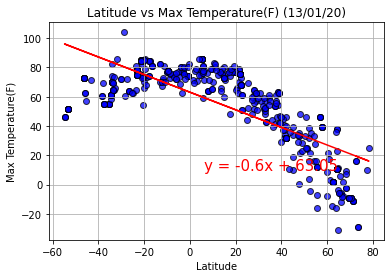

The r value and regression line indicate a moderate relationship between Latitude and Max Temp with latitudes further from the equator (0) having a reduced maximum temperature 


In [13]:
def make_scatter(x, y, title, xlab,ylab):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    x_limit = 80
    x_axis = np.arange(-60, x_limit, 1)
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black",alpha=0.75)
    plt.grid(b=None, which='major', axis='both')
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    print(f"The r-squared value is: {round(rvalue**2,4)}")
    plt.show()
    
    # Print out the r-squared value along with the plot.

make_scatter(clean_city_data["Latitude"],clean_city_data["Temperature"],"Latitude vs Max Temperature(F) (13/01/20)","Latitude","Max Temperature(F)")

print("The r value and regression line indicate a moderate relationship between Latitude and Max Temp with latitudes further from the equator (0) having a reduced maximum temperature ")


## Latitude vs. Humidity Plot

The r-squared value is: 0.0019


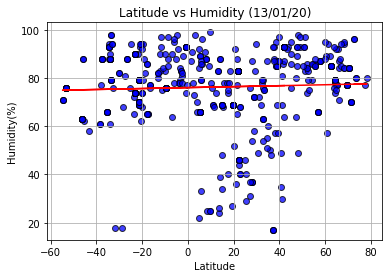

The r value and regression line indicate a extremely weak relationship between Latitude and Humidity and visually the data does not seem to show a trend.


In [14]:
make_scatter(clean_city_data["Latitude"],clean_city_data["Humidity"],"Latitude vs Humidity (13/01/20)","Latitude","Humidity(%)")
print("The r value and regression line indicate a extremely weak relationship between Latitude and Humidity and visually the data does not seem to show a trend.")


## Latitude vs. Cloudiness Plot

The r-squared value is: 0.0736


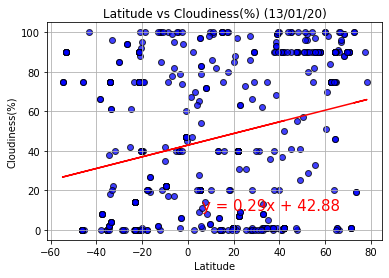

The r value and regression line indicate a fairly weak relationship between Latitude and Cloudiness with some gradient in the regression but visually very little trend


In [15]:
make_scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness"],"Latitude vs Cloudiness(%) (13/01/20)","Latitude","Cloudiness(%)")
print("The r value and regression line indicate a fairly weak relationship between Latitude and Cloudiness with some gradient in the regression but visually very little trend")


## Latitude vs. Wind Speed Plot

The r-squared value is: 0.0001


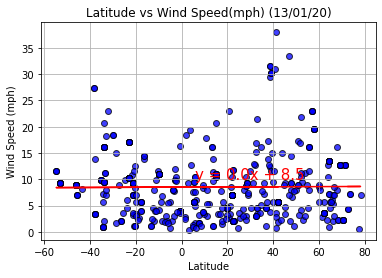

The r value and regression line indicate a extremely weak relationship between Latitude and Wind Speed, and visually the data does not seem to show a trend.


In [16]:
make_scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed"],"Latitude vs Wind Speed(mph) (13/01/20)","Latitude","Wind Speed (mph)")
print("The r value and regression line indicate a extremely weak relationship between Latitude and Wind Speed, and visually the data does not seem to show a trend.")


## Linear Regression

In [17]:
North_Hemi_Df = clean_city_data.loc[(clean_city_data["Latitude"] >= 0)]
South_Hemi_Df = clean_city_data.loc[(clean_city_data["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.8433


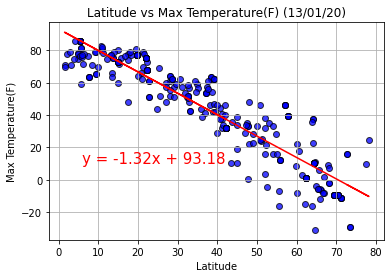

The r value and regression line indicate a strong negative relationship between Latitude and Max Temp within the northern hemisphere, with a reduced max temp as distance from equator increases.


In [18]:
make_scatter(North_Hemi_Df["Latitude"],North_Hemi_Df["Temperature"],"Latitude vs Max Temperature(F) (13/01/20)","Latitude","Max Temperature(F)")
print("The r value and regression line indicate a strong negative relationship between Latitude and Max Temp within the northern hemisphere, with a reduced max temp as distance from equator increases.")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.3433


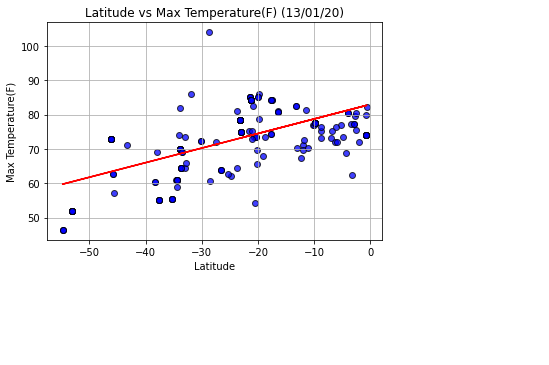

The r value and regression line indicate a moderate to weak positive relationship between Latitude and Max Temp within the Southern Hemisphere, with a slight trend toward warmer temps closer to the equator.


In [19]:
make_scatter(South_Hemi_Df["Latitude"],South_Hemi_Df["Temperature"],"Latitude vs Max Temperature(F) (13/01/20)","Latitude","Max Temperature(F)")
print("The r value and regression line indicate a moderate to weak positive relationship between Latitude and Max Temp within the Southern Hemisphere, with a slight trend toward warmer temps closer to the equator.")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.1003


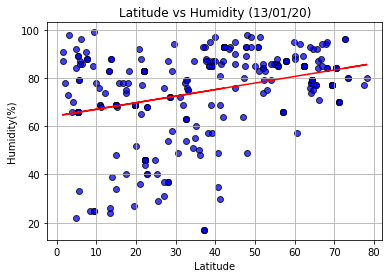

The r value and regression line indicate a moderate to weak positive relationship between Latitude and Humidity within the Northern Hemisphere, with a slight trend toward higher humidity levels further from the equator.


In [20]:
make_scatter(North_Hemi_Df["Latitude"],North_Hemi_Df["Humidity"],"Latitude vs Humidity (13/01/20)","Latitude","Humidity(%)")
print("The r value and regression line indicate a moderate to weak positive relationship between Latitude and Humidity within the Northern Hemisphere, with a slight trend toward higher humidity levels further from the equator.")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.0721


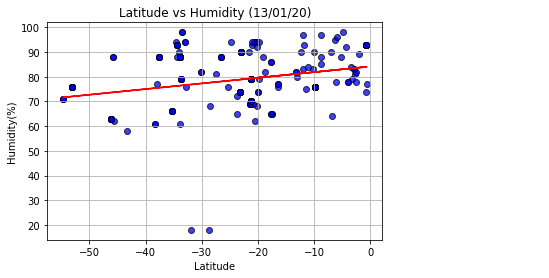

The r value and regression line indicate a moderate to weak positive relationship between Latitude and Humidity within the Southern Hemisphere, with a slight trend toward higher humidity levels closer to the equator.


In [21]:
make_scatter(South_Hemi_Df["Latitude"],South_Hemi_Df["Humidity"],"Latitude vs Humidity (13/01/20)","Latitude","Humidity(%)")
print("The r value and regression line indicate a moderate to weak positive relationship between Latitude and Humidity within the Southern Hemisphere, with a slight trend toward higher humidity levels closer to the equator.")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.1285


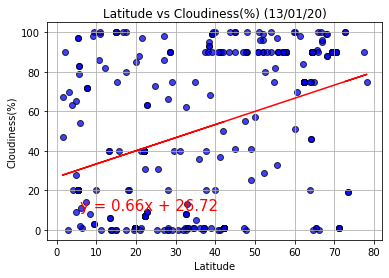

The r value and regression line indicate a weak relationship between Latitude and Cloudiness within the Northern Hemisphere with some gradient in the regression indicating higher cloud cover further from equator but visually very little trend


In [22]:
make_scatter(North_Hemi_Df["Latitude"],North_Hemi_Df["Cloudiness"],"Latitude vs Cloudiness(%) (13/01/20)","Latitude","Cloudiness(%)")
print("The r value and regression line indicate a weak relationship between Latitude and Cloudiness within the Northern Hemisphere with some gradient in the regression indicating higher cloud cover further from equator but visually very little trend")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0019


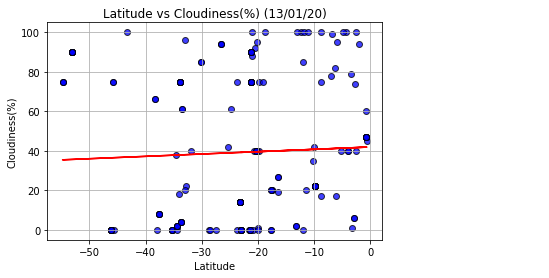

The r value and regression line indicate a moderate to weak relationship between Latitude and Cloudiness within the Southern hemisphere with some gradient in the regression indicating higher cloud cover closer to the equator.


In [23]:
make_scatter(South_Hemi_Df["Latitude"],South_Hemi_Df["Cloudiness"],"Latitude vs Cloudiness(%) (13/01/20)","Latitude","Cloudiness(%)")
print("The r value and regression line indicate a moderate to weak relationship between Latitude and Cloudiness within the Southern hemisphere with some gradient in the regression indicating higher cloud cover closer to the equator.")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0233


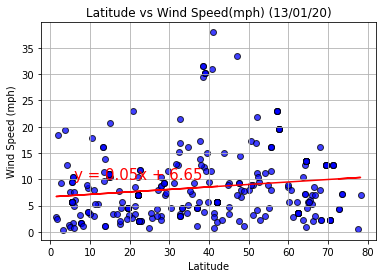

The r value and regression line indicate a relationship between Latitude and Wind Speed within the Norther Hemisphere, with a very slight positive trend indicating greater wind speed further from equator


In [24]:
make_scatter(North_Hemi_Df["Latitude"],North_Hemi_Df["Wind Speed"],"Latitude vs Wind Speed(mph) (13/01/20)","Latitude","Wind Speed (mph)")
print("The r value and regression line indicate a relationship between Latitude and Wind Speed within the Norther Hemisphere, with a very slight positive trend indicating greater wind speed further from equator")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.0595


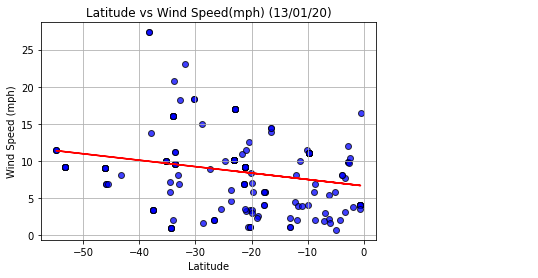

The r value and regression line indicate a extremely weak relationship between Latitude and Wind Speed within the southern hemisphere, with a very slight negative relationship indicating slightly reduced wind speed closer to equator.


In [25]:
make_scatter(South_Hemi_Df["Latitude"],South_Hemi_Df["Wind Speed"],"Latitude vs Wind Speed(mph) (13/01/20)","Latitude","Wind Speed (mph)")
print("The r value and regression line indicate a extremely weak relationship between Latitude and Wind Speed within the southern hemisphere, with a very slight negative relationship indicating slightly reduced wind speed closer to equator.")
